# Data Exploration
The purpose of this notebook is to explore the data in the datasets HeadQA, containing information in spanish from medical (and some other fields of natural sciences) spanish exams.

In [1]:
!pip install textstat


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import libraries
import pandas as pd
import json
from matplotlib import pyplot as plt
import seaborn as sns
import textstat
textstat.set_lang('es')

In [ ]:
headqa_paths = ["data_raw/HEAD/HEAD/test_HEAD.json", "data_raw/HEAD/HEAD/train_HEAD.json"] # path to labeled data
cowese_path = "data_raw/CoWeSe.txt" # path to unlabeled data

In [ ]:
# load HeadQA data
headqa_data = []

for path in headqa_paths:
    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        cuadernos = list(data['exams'].keys())
        for cuaderno in cuadernos:
            # if cuaderno[-1] == 'M' or cuaderno[-1] == 'F' or cuaderno[-1] == 'E': # only keep medical exams
            questions = data['exams'][cuaderno]['data']
            headqa_data.extend(questions)

print(f'Number of questions in HeadQA: {len(headqa_data)}')

Number of questions in HeadQA: 5399


In [14]:
headqa_data[500]

{'qid': '52',
 'qtext': '¿Dónde se encuentran las células endocrinas que secretan la mayor parte de la prolactina humana?:',
 'ra': '1',
 'answers': [{'aid': 1, 'atext': 'Adenohipófisis.'},
  {'aid': 2, 'atext': 'Neurohipófisis.'},
  {'aid': 3, 'atext': 'Ovario.'},
  {'aid': 4, 'atext': 'Glándula mamaria.'}],
 'image': ''}

Explore the number of questions directly related to images (which we will ignore).

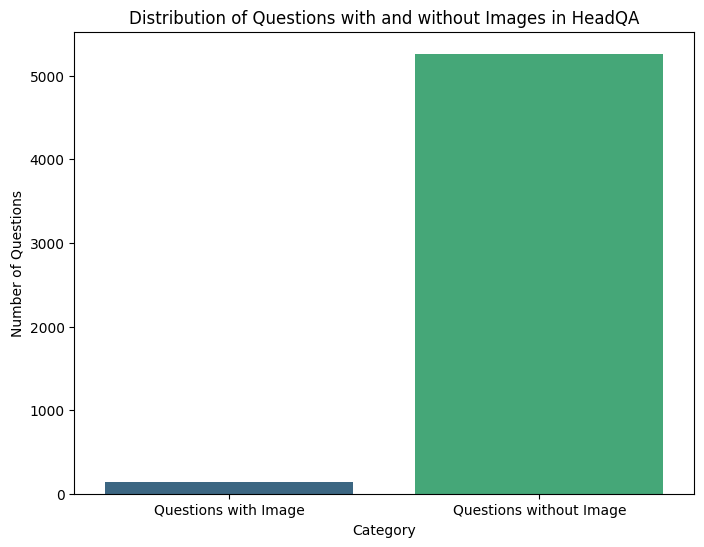

<Figure size 640x480 with 0 Axes>

In [15]:
total_questions = len(headqa_data)
num_questions_with_image = sum(1 for question in headqa_data if question['image'] != '')
num_questions_without_image = len(headqa_data) - num_questions_with_image

categories = ['Questions with Image', 'Questions without Image']
counts = [num_questions_with_image, num_questions_without_image]

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts, palette='viridis', hue=categories)

plt.title('Distribution of Questions with and without Images in HeadQA')
plt.ylabel('Number of Questions')
plt.xlabel('Category')
plt.show()

plt.savefig('distribution_questions_with_without_images.pdf')


In [16]:
headqa_data_no_image = [question for question in headqa_data if question['image'] == '']

Explore the distribution of the amount of words in questions and answers.

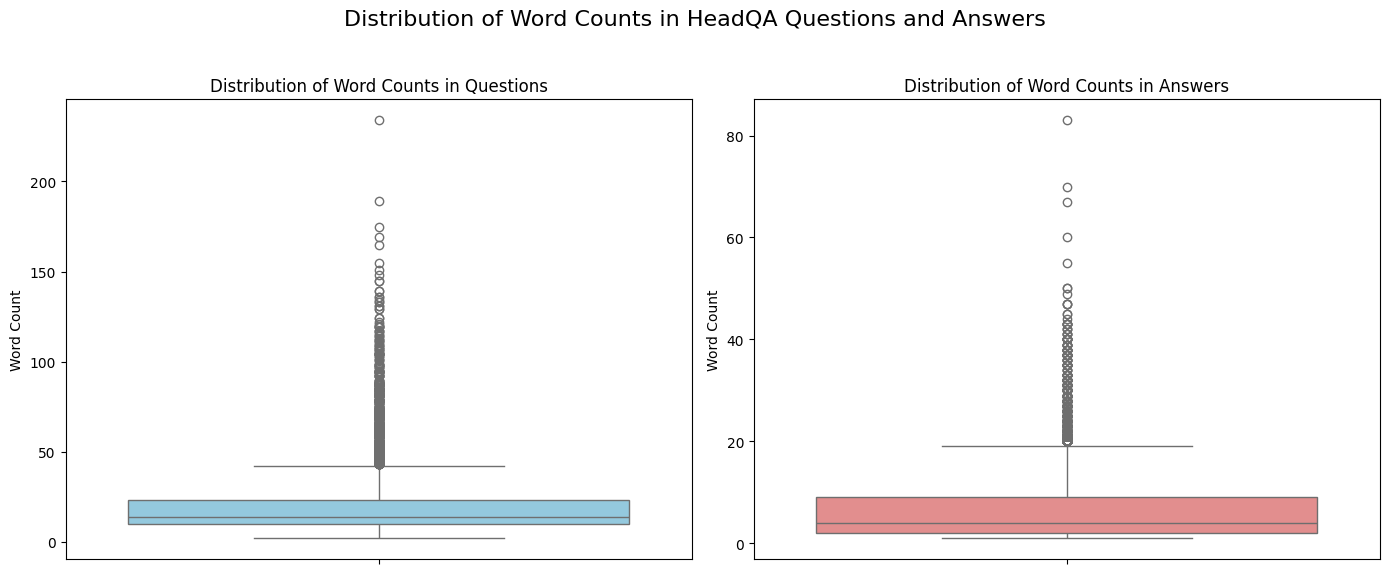

<Figure size 640x480 with 0 Axes>

In [20]:
question_word_counts = [len(q['qtext'].split()) for q in headqa_data_no_image]
answer_word_counts = []
for q in headqa_data_no_image:
    for ans in q['answers']:
        answer_word_counts.append(len(ans['atext'].split()))

# Create boxplots to visualize the distributions
plt.figure(figsize=(14, 6))

# Boxplot for Question Word Counts
plt.subplot(1, 2, 1)
sns.boxplot(y=question_word_counts, color='skyblue')
plt.title('Distribution of Word Counts in Questions')
plt.ylabel('Word Count')
plt.xlabel('') 

# Boxplot for Answer Word Counts
plt.subplot(1, 2, 2)
sns.boxplot(y=answer_word_counts, color='lightcoral')
plt.title('Distribution of Word Counts in Answers')
plt.ylabel('Word Count')
plt.xlabel('')

plt.suptitle('Distribution of Word Counts in HeadQA Questions and Answers', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.savefig('distribution_word_counts_questions_answers.pdf')

## Technicity of the dataset
Use the Flesch–Szigriszt index to explore how technical is the language in the dataset.

In [ ]:
df =pd.DataFrame(headqa_data_no_image)

def inflesz_score(text:str) -> float:
    """Calculate the Flesch Reading Ease score for a given text."""
    return textstat.flesch_reading_ease(text)

df["flesch_index_question"] = df["qtext"].apply(inflesz_score)
df.head()


,qid,qtext,ra,answers,image,flesch_index_question
0,1,Forma fibras extracelulares con gran resistenc...,2,"[{'aid': 1, 'atext': 'Fibronectina.'}, {'aid':...",,64.326667
1,2,El fosfolípido cardiolipina es abundante en la...,1,"[{'aid': 1, 'atext': 'Mitocondrial interna.'},...",,48.680000
2,3,NO es una función de los filamentos intermedios:,4,"[{'aid': 1, 'atext': 'Proporcionar apoyo estru...",,86.180000
3,4,Los cuerpos multivesiculares son:,4,"[{'aid': 1, 'atext': 'Peroxisomas.'}, {'aid': ...",,37.760000
4,5,Forman la envuelta de mielina de los axones en...,2,"[{'aid': 1, 'atext': 'Oligodendrocitos.'}, {'a...",,68.964615


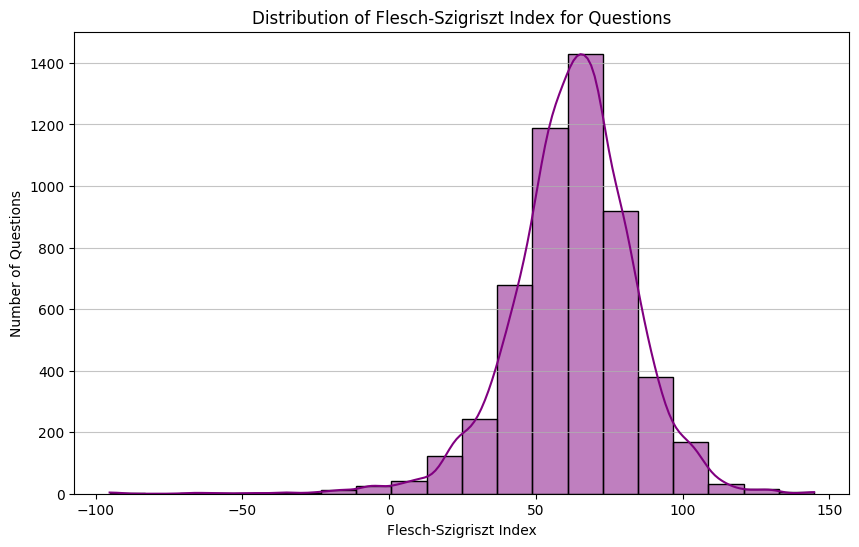

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['flesch_index_question'], bins=20, kde=True, color='purple')
plt.title('Distribution of Flesch-Szigriszt Index for Questions')
plt.xlabel('Flesch-Szigriszt Index')
plt.ylabel('Number of Questions')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.savefig('distribution_flesch_index_questions.pdf')

## Explore text in CoWeSe

In [50]:
cowese_data = []
with open(cowese_path, 'r', encoding='utf-8') as f:
    for line in f:
        cowese_data.append(line.strip())

print(len(cowese_data))

40918081


In [52]:
cowese_data[0:10]

['Existen diversos factores que influyen en el paso de sustancias a la leche materna como, por ejemplo, la unión a proteínas plasmáticas, ionización, grado de liposolubilidad, peso molecular, etc. Tales parámetros varían según los fármacos.',
 'Además, no hay suficientes estudios para un número elevado de medicamentos, sobre todo para los de reciente comercialización.',
 'De hecho, la recomendación «contraindicado durante la lactancia», hace referencia sobre todo a la falta de estudios farmacocinéticos sobre la excreción en leche materna, y no a la existencia de observaciones clínicas.',
 'En este artículo se exponen los datos disponibles sobre fármacos de uso común y algunos principios sencillos para facilitar la labor de los profesionales de la salud a la hora de prescribir medicación a una mujer durante la lactancia.',
 '',
 'El asma es una enfermedad inflamatoria crónica de las vías respiratorias que provoca una obstrucción bronquial reversible.',
 'En los países industrializados, 

In [ ]:
# create complete texts instead of just sentences
complete_documents = []
complete_document = ""
for text in cowese_data:
    if text == "":
        complete_documents.append(complete_document)
        complete_document = ""
    else:
        complete_document += text + " "

# remove trailing spaces
complete_documents = [document.strip() for document in complete_documents]

print(len(complete_documents))